In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from itertools import cycle
import imblearn
import seaborn as sns

In [2]:
#importing dataset

dataset = pd.read_csv("C:/ML_Project/Datasets/FullDataSet.csv")

In [3]:
#view first 5 data

dataset.head()

,AvgAmount,MaxAmount,AvgCount,MaxCount,AccountType,ProductName,BranchId,RiskLevel,DepositTotal,WTotal,Amount,CategoryName,TransactionType,ScrCustomerType,LengthOfRelation,IsAlerted,IsReported
0,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,20000,AC2,D,Individual,67.0,1,1
1,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,15,AC2,D,Individual,67.0,1,1
2,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,15,AC2,D,Individual,67.0,1,1
3,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,20000,AC2,D,Individual,67.0,1,1
4,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,15,AC2,D,Individual,67.0,1,1


In [4]:
#info about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   AvgAmount         1048575 non-null  int64  
 1   MaxAmount         1048575 non-null  int64  
 2   AvgCount          1048575 non-null  int64  
 3   MaxCount          1048575 non-null  int64  
 4   AccountType       1014108 non-null  object 
 5   ProductName       1048575 non-null  object 
 6   BranchId          1048575 non-null  int64  
 7   RiskLevel         1048575 non-null  object 
 8   DepositTotal      1048575 non-null  float64
 9   WTotal            1048575 non-null  float64
 10  Amount            1048575 non-null  int64  
 11  CategoryName      1048575 non-null  object 
 12  TransactionType   1048575 non-null  object 
 13  ScrCustomerType   1048575 non-null  object 
 14  LengthOfRelation  1048563 non-null  float64
 15  IsAlerted         1048575 non-null  int64  
 16  

In [5]:
#shape of dataset

dataset.shape

(1048575, 17)

In [6]:
#target column value count

dataset['IsReported'].value_counts()

0    1047938
1        637
Name: IsReported, dtype: int64

In [7]:
#count rows which values are less than 1000

dataset[dataset['Amount'] < 1000].count()

AvgAmount           326794
MaxAmount           326794
AvgCount            326794
MaxCount            326794
AccountType         313866
ProductName         326794
BranchId            326794
RiskLevel           326794
DepositTotal        326794
WTotal              326794
Amount              326794
CategoryName        326794
TransactionType     326794
ScrCustomerType     326794
LengthOfRelation    326794
IsAlerted           326794
IsReported          326794
dtype: int64

In [8]:
#eliminate rows which values are less than 1000

dataset.drop(dataset[dataset['Amount'] < 1000].index, inplace=True)

In [9]:
dataset[dataset['Amount'] < 1000].count()

AvgAmount           0
MaxAmount           0
AvgCount            0
MaxCount            0
AccountType         0
ProductName         0
BranchId            0
RiskLevel           0
DepositTotal        0
WTotal              0
Amount              0
CategoryName        0
TransactionType     0
ScrCustomerType     0
LengthOfRelation    0
IsAlerted           0
IsReported          0
dtype: int64

In [10]:
#checking null values

dataset.isnull().sum()

AvgAmount               0
MaxAmount               0
AvgCount                0
MaxCount                0
AccountType         21539
ProductName             0
BranchId                0
RiskLevel               0
DepositTotal            0
WTotal                  0
Amount                  0
CategoryName            0
TransactionType         0
ScrCustomerType         0
LengthOfRelation       12
IsAlerted               0
IsReported              0
dtype: int64

In [11]:
#eleminating row wise 'null values'

dataset = dataset.dropna()

In [12]:
#checking null values

dataset.isnull().sum()

AvgAmount           0
MaxAmount           0
AvgCount            0
MaxCount            0
AccountType         0
ProductName         0
BranchId            0
RiskLevel           0
DepositTotal        0
WTotal              0
Amount              0
CategoryName        0
TransactionType     0
ScrCustomerType     0
LengthOfRelation    0
IsAlerted           0
IsReported          0
dtype: int64

In [13]:
dataset.shape

(700230, 17)

In [14]:
dataset['IsReported'].value_counts()

0    699734
1       496
Name: IsReported, dtype: int64

In [15]:
dataset

,AvgAmount,MaxAmount,AvgCount,MaxCount,AccountType,ProductName,BranchId,RiskLevel,DepositTotal,WTotal,Amount,CategoryName,TransactionType,ScrCustomerType,LengthOfRelation,IsAlerted,IsReported
0,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,20000,AC2,D,Individual,67.0,1,1
3,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,20000,AC2,D,Individual,67.0,1,1
5,144152,308962,67,146,Current,Current Deposits - SME,15,Low,3000000.0,2500000.0,40000,ACW,D,Entity,38.0,1,1
6,144152,308962,67,146,Current,Current Deposits - SME,15,Low,3000000.0,2500000.0,40000,ACW,D,Entity,38.0,1,1
7,144152,308962,67,146,Current,Current Deposits - SME,15,Low,3000000.0,2500000.0,40000,ACW,D,Entity,38.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,21073,54130,15,29,Savings,EBL Easy Account,56,Low,110000.0,90000.0,1829,CAA,C,Individual,39.0,0,0
1048570,21197,114293,5,15,Savings,EBL Max Saver,49,Low,80000.0,70000.0,2400,CQW,D,Individual,75.0,0,0
1048571,2479,4424,6,16,Savings,EBL SALARY,53,Low,21000.0,19000.0,2423,CAA,C,Individual,24.0,0,0
1048573,51864,547889,4,12,Savings,EBL Platinum Plus Savings,16,Low,100000.0,80000.0,10000,CQW,D,Individual,152.0,0,0


In [16]:
#selecting features and target

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,16]

In [17]:
x

,AvgAmount,MaxAmount,AvgCount,MaxCount,AccountType,ProductName,BranchId,RiskLevel,DepositTotal,WTotal,Amount,CategoryName,TransactionType,ScrCustomerType,LengthOfRelation,IsAlerted
0,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,20000,AC2,D,Individual,67.0,1
3,14203,32543,65,192,Savings,EBL Junior,89,Low,160000.0,140000.0,20000,AC2,D,Individual,67.0,1
5,144152,308962,67,146,Current,Current Deposits - SME,15,Low,3000000.0,2500000.0,40000,ACW,D,Entity,38.0,1
6,144152,308962,67,146,Current,Current Deposits - SME,15,Low,3000000.0,2500000.0,40000,ACW,D,Entity,38.0,1
7,144152,308962,67,146,Current,Current Deposits - SME,15,Low,3000000.0,2500000.0,40000,ACW,D,Entity,38.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,21073,54130,15,29,Savings,EBL Easy Account,56,Low,110000.0,90000.0,1829,CAA,C,Individual,39.0,0
1048570,21197,114293,5,15,Savings,EBL Max Saver,49,Low,80000.0,70000.0,2400,CQW,D,Individual,75.0,0
1048571,2479,4424,6,16,Savings,EBL SALARY,53,Low,21000.0,19000.0,2423,CAA,C,Individual,24.0,0
1048573,51864,547889,4,12,Savings,EBL Platinum Plus Savings,16,Low,100000.0,80000.0,10000,CQW,D,Individual,152.0,0


In [18]:
y

0          1
3          1
5          1
6          1
7          1
          ..
1048569    0
1048570    0
1048571    0
1048573    0
1048574    0
Name: IsReported, Length: 700230, dtype: int64

<AxesSubplot: xlabel='IsReported', ylabel='count'>

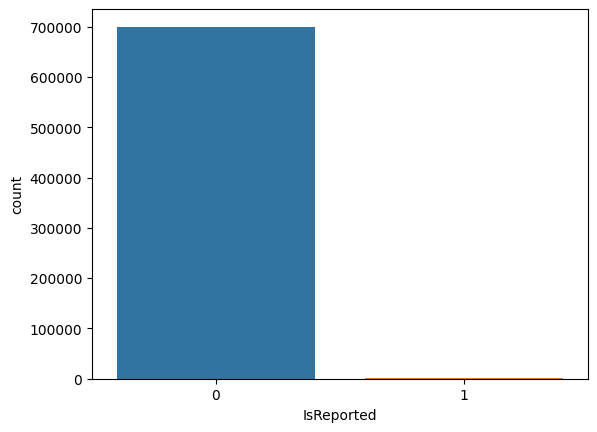

In [19]:
sns.countplot(x=y)

In [20]:
#checking varity of values in a specifice column

x['ScrCustomerType'].unique()

array(['Individual', 'Entity'], dtype=object)

In [21]:
#applying label encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

x['AccountType']= label_encoder.fit_transform(x['AccountType'])
x['ProductName']= label_encoder.fit_transform(x['ProductName'])
x['RiskLevel']= label_encoder.fit_transform(x['RiskLevel'])
x['CategoryName']= label_encoder.fit_transform(x['CategoryName'])
x['TransactionType']= label_encoder.fit_transform(x['TransactionType'])
x['ScrCustomerType']= label_encoder.fit_transform(x['ScrCustomerType'])

In [22]:
x

,AvgAmount,MaxAmount,AvgCount,MaxCount,AccountType,ProductName,BranchId,RiskLevel,DepositTotal,WTotal,Amount,CategoryName,TransactionType,ScrCustomerType,LengthOfRelation,IsAlerted
0,14203,32543,65,192,7,30,89,2,160000.0,140000.0,20000,4,1,1,67.0,1
3,14203,32543,65,192,7,30,89,2,160000.0,140000.0,20000,4,1,1,67.0,1
5,144152,308962,67,146,0,3,15,2,3000000.0,2500000.0,40000,7,1,0,38.0,1
6,144152,308962,67,146,0,3,15,2,3000000.0,2500000.0,40000,7,1,0,38.0,1
7,144152,308962,67,146,0,3,15,2,3000000.0,2500000.0,40000,7,1,0,38.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,21073,54130,15,29,7,20,56,2,110000.0,90000.0,1829,36,0,1,39.0,0
1048570,21197,114293,5,15,7,32,49,2,80000.0,70000.0,2400,55,1,1,75.0,0
1048571,2479,4424,6,16,7,49,53,2,21000.0,19000.0,2423,36,0,1,24.0,0
1048573,51864,547889,4,12,7,40,16,2,100000.0,80000.0,10000,55,1,1,152.0,0


In [23]:
x = x.values
y= y.values

In [24]:
#test-train split

from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
#Random oversampling 

from imblearn.over_sampling import RandomOverSampler
re_smp_ro = RandomOverSampler(random_state = 0)
x_train_ro, y_train_ro = re_smp_ro.fit_resample(x_train, y_train)

<AxesSubplot: ylabel='count'>

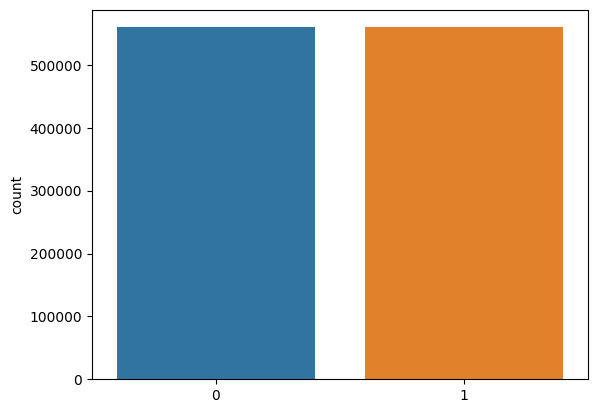

In [26]:
sns.countplot(x=y_train_ro)

In [27]:
#scalling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train_ro = sc_x.fit_transform(x_train_ro)
x_test = sc_x.transform(x_test)

In [28]:
#applying XGBoost model

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train_ro, y_train_ro)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [29]:
#make prediction using test data

y_pred = classifier.predict(x_test)

In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
#confusion matrix and prediction report

from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test, y_pred)

In [32]:
#cross validation

accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

In [33]:
accuracies

array([0.99998215, 0.99994645, 0.99995537, 0.99989289, 0.99992859])

[[139874     84]
 [     0     88]]


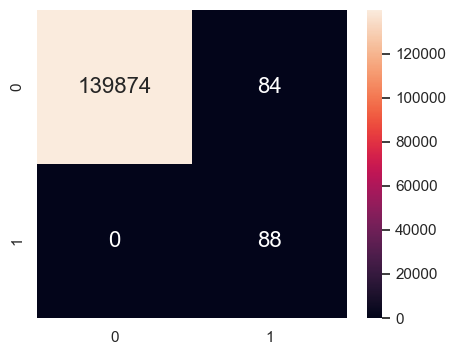

In [34]:
#viewing confusion matrix

print(cm)

plt.figure(figsize = (5,4))
sns.set(font_scale=1) # for label size
sns.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 16}) # font size

plt.show()

In [35]:
#viewing prediction report

print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139958
           1       0.51      1.00      0.68        88

    accuracy                           1.00    140046
   macro avg       0.76      1.00      0.84    140046
weighted avg       1.00      1.00      1.00    140046



In [36]:
#AUC score

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.999699909972992

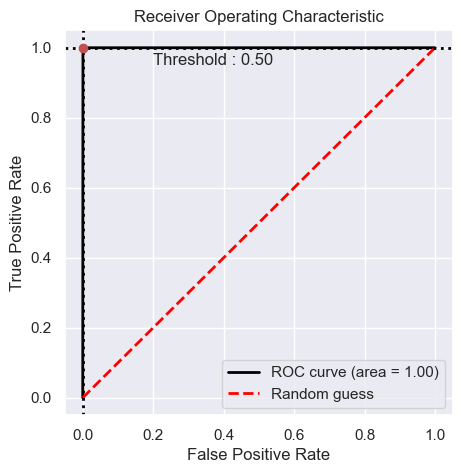

In [37]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [38]:
#ROC curve initiate

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

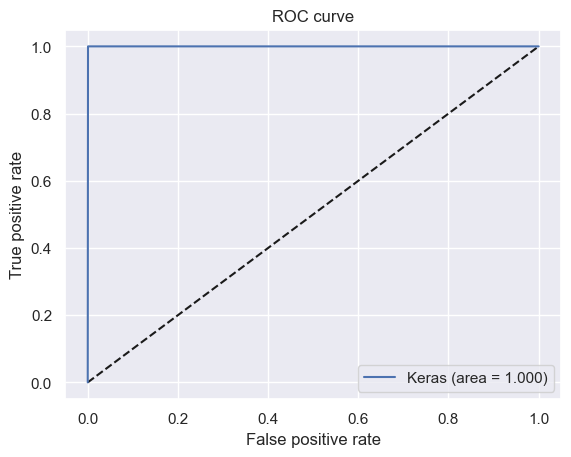

In [39]:
#plotting ROC curve

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#............................................................................................................................#

In [ ]:
#testing

In [126]:
test_data = pd.read_csv("C:/ML_Project/Datasets/test.csv")

In [127]:
test_data

,AvgAmount,MaxAmount,AvgCount,MaxCount,AccountType,Name,BranchId,RiskLevel,DepositTotal,WTotal,Amount,CategoryName,TransactionType,ScrCustomerType,LengthOfRelation,IsAlerted
0,12117,49747,7,23,Savings,EBL SALARY,9,Low,25000,18000,18600,SKD,D,Individual,97,1
1,166479,238146,33,59,Current,Current Deposits - SME,9,Low,470000,410000,190000,CQ4,D,Entity,24,1


In [128]:
#applying label encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

test_data['AccountType']= label_encoder.fit_transform(test_data['AccountType'])
test_data['Name']= label_encoder.fit_transform(test_data['Name'])
test_data['RiskLevel']= label_encoder.fit_transform(test_data['RiskLevel'])
test_data['CategoryName']= label_encoder.fit_transform(test_data['CategoryName'])
test_data['TransactionType']= label_encoder.fit_transform(test_data['TransactionType'])
test_data['ScrCustomerType']= label_encoder.fit_transform(test_data['ScrCustomerType'])

In [129]:
test_data

,AvgAmount,MaxAmount,AvgCount,MaxCount,AccountType,Name,BranchId,RiskLevel,DepositTotal,WTotal,Amount,CategoryName,TransactionType,ScrCustomerType,LengthOfRelation,IsAlerted
0,12117,49747,7,23,1,1,9,0,25000,18000,18600,1,0,1,97,1
1,166479,238146,33,59,0,0,9,0,470000,410000,190000,0,0,0,24,1


In [130]:
test_data.values

array([[ 12117,  49747,      7,     23,      1,      1,      9,      0,
         25000,  18000,  18600,      1,      0,      1,     97,      1],
       [166479, 238146,     33,     59,      0,      0,      9,      0,
        470000, 410000, 190000,      0,      0,      0,     24,      1]],
      dtype=int64)

In [131]:
y_pred_test = classifier.predict(test_data)

In [132]:
y_pred_test

array([0, 0])